# General Numerical Solution of Cylindrical Waves by Piran, Safier, and Stark
##  Geoff Cope
##  Univeristy of Utah
##  December 22, 2021

https://journals.aps.org/prd/abstract/10.1103/PhysRevD.32.3101

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,r,z,phi,dt,dr,dz,dphi = symbols('t r z phi dt dr dz dphi')

In [4]:
psi = Function('psi')(r,t)
psi

In [5]:
omega = Function('omega')(r,t)
omega

In [6]:
gamma = Function('gamma')(r,t)
gamma

In [7]:
variables = Matrix( [t,r,phi,z] )
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [7]:
differentials = Matrix( [dt,dr,dphi,dz] ) 
differentials

⎡ dt ⎤
⎢    ⎥
⎢ dr ⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [8]:
lineElement = expand(exp(2*(gamma-psi)) * ( dt**2 - dr**2 ) - exp(2*psi) * (dz + omega * dphi)**2 - r**2*exp(-2*psi)*dphi**2)
lineElement

In [9]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡ 2⋅γ(r, t)  -2⋅ψ(r, t)                                                                     
⎢ℯ         ⋅ℯ                       0                               0                       
⎢                                                                                           
⎢                          2⋅γ(r, t)  -2⋅ψ(r, t)                                            
⎢          0             -ℯ         ⋅ℯ                              0                       
⎢                                                                                           
⎢                                                    2  -2⋅ψ(r, t)    2        2⋅ψ(r, t)    
⎢          0                        0             - r ⋅ℯ           - ω (r, t)⋅ℯ           -ω
⎢                                                                                           
⎢                                                                    2⋅ψ(r, t)              
⎣          0                        0                      -ω(r, t)⋅ℯ 

In [10]:
import sympy

In [11]:
m = sympy.Array(g)
m

⎡ 2⋅γ(r, t)  -2⋅ψ(r, t)                                                                     
⎢ℯ         ⋅ℯ                       0                               0                       
⎢                                                                                           
⎢                          2⋅γ(r, t)  -2⋅ψ(r, t)                                            
⎢          0             -ℯ         ⋅ℯ                              0                       
⎢                                                                                           
⎢                                                    2  -2⋅ψ(r, t)    2        2⋅ψ(r, t)    
⎢          0                        0             - r ⋅ℯ           - ω (r, t)⋅ℯ           -ω
⎢                                                                                           
⎢                                                                    2⋅ψ(r, t)              
⎣          0                        0                      -ω(r, t)⋅ℯ 

In [12]:
from einsteinpy.symbolic import *

In [13]:
syms = sympy.symbols("t r phi z")
t,r,phi,z = syms

In [14]:
metric = MetricTensor(m,syms)

In [15]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢⎡∂             ∂            ∂             ∂                                                
⎢⎢──(γ(r, t)) - ──(ψ(r, t))  ──(γ(r, t)) - ──(ψ(r, t))                                      
⎢⎢∂t            ∂t           ∂r            ∂r                                               
⎢⎢                                                                                          
⎢⎢∂             ∂            ∂             ∂                                                
⎢⎢──(γ(r, t)) - ──(ψ(r, t))  ──(γ(r, t)) - ──(ψ(r, t))                                      
⎢⎢∂r            ∂r           ∂t            ∂t                         

In [16]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                           
⎢                                                                               ∂           
⎢  2              2              2                           2     2            ──(γ(r, t)) 
⎢ ∂              ∂              ∂               ⎛∂          ⎞     ∂             ∂r          
⎢───(γ(r, t)) - ───(γ(r, t)) - ───(ψ(r, t)) - 2⋅⎜──(ψ(r, t))⎟  + ───(ψ(r, t)) + ─────────── 
⎢  2              2              2              ⎝∂t         ⎠      2                 r      
⎢∂r             ∂t             ∂r                                ∂t                         
⎢                                                                                           
⎢                                                                                           
⎢                                                         ∂              4⋅ψ(r, t) ∂        
⎢                                                         ──(γ(r, t)) 

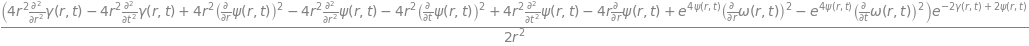

In [19]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [20]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                               ∂           
⎢  2              2              2                           2     2            ──(γ(r, t)) 
⎢ ∂              ∂              ∂               ⎛∂          ⎞     ∂             ∂r          
⎢───(γ(r, t)) - ───(γ(r, t)) - ───(ψ(r, t)) - 2⋅⎜──(ψ(r, t))⎟  + ───(ψ(r, t)) + ─────────── 
⎢  2              2              2              ⎝∂t         ⎠      2                 r      
⎢∂r             ∂t             ∂r                                ∂t                         
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [21]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [22]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

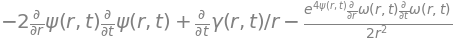

In [27]:
ricci10 = Ric.tensor()[1,0]
ricci10

In [28]:
equation2d = Eq(diff(gamma,t),solve( ricci10 , diff(gamma,t) )[0] )
equation2d

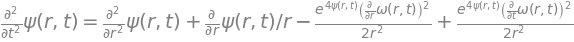

In [37]:
equation2a = Eq( diff(psi,t,2), expand(solve( Ric.tensor()[3,3], diff(psi,t,2) )[0]) ) 
equation2a

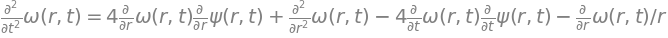

In [49]:
equation2b = Eq( diff(omega,t,2),solve( simplify(Ric.tensor()[2,3].subs(equation2a.args[0],equation2a.args[1] )), diff(omega,t,2) )[0] )
equation2b

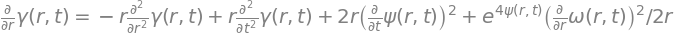

In [67]:
equation2c = simplify(Eq(diff(gamma,r),solve( Ric.tensor()[0,0], diff(gamma,r) )[0] ).subs(equation2a.args[0],equation2a.args[1]))
equation2c

In [70]:
fieldEquations = Matrix([equation2a,equation2b,equation2c,equation2d])
fieldEquations

⎡                                                                    2                      
⎢                              ∂              4⋅ψ(r, t) ⎛∂          ⎞     4⋅ψ(r, t) ⎛∂      
⎢  2              2            ──(ψ(r, t))   ℯ         ⋅⎜──(ω(r, t))⎟    ℯ         ⋅⎜──(ω(r,
⎢ ∂              ∂             ∂r                       ⎝∂r         ⎠               ⎝∂t     
⎢───(ψ(r, t)) = ───(ψ(r, t)) + ─────────── - ───────────────────────── + ───────────────────
⎢  2              2                 r                      2                           2    
⎢∂t             ∂r                                      2⋅r                         2⋅r     
⎢                                                                                           
⎢                                                                                      ∂    
⎢  2                                          2                                        ──(ω(
⎢ ∂               ∂           ∂              ∂               ∂        